In [ ]:
import numpy as np
import cv2, glob, os
from keras.models import model_from_json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

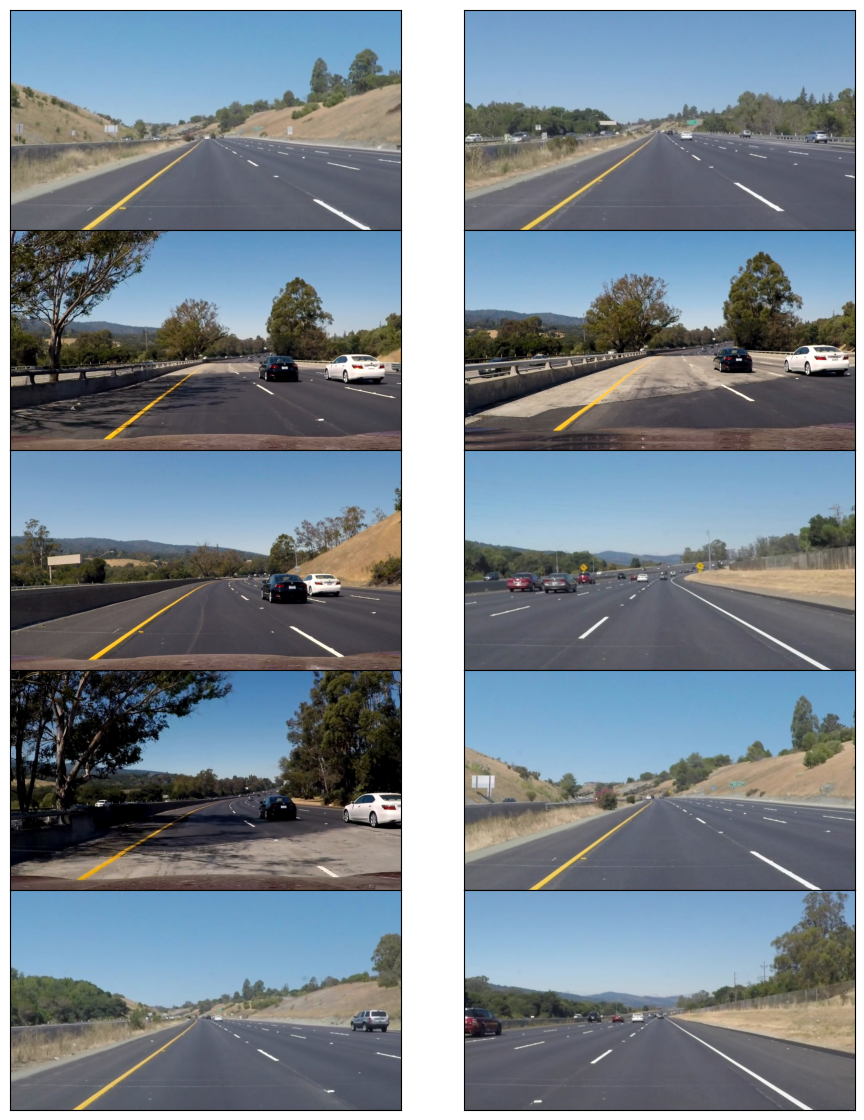

In [ ]:
# plotting the testing image
# show the images
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images) + 1) // cols
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        cmap = "gray" if len(image.shape) == 2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()


test_images = [
    plt.imread(path) for path in glob.glob("/kaggle/input/img-2-1/test_images/*.jpg")
]
show_images(test_images)

In [ ]:
# Loading pretrained model
# Load the model json file
json_file = open("/kaggle/input/dataset-cnn2-1/model.json", "r")
json_model = json_file.read()
json_file.close()

# load the model from the json
model = model_from_json(json_model)

# load the wights of the model
model.load_weights("/kaggle/input/dataset-cnn2-1/model.weights.h5")

In [ ]:
# Creating a class lane
class Lanes:
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

In [ ]:
def road_lines_image(image_path):
    # Read the original image using OpenCV
    img_arr = cv2.imread(image_path)

    # Resize to original size for overlay later (1280x720 is standard for lane detection)
    actual_image = cv2.resize(img_arr, (1280, 720))

    # Load image with matplotlib for RGB format (OpenCV reads as BGR)
    img_rgb = mpimg.imread(image_path)

    # Resize the image to the model's input size (e.g., 160x80)
    small_img = cv2.resize(img_rgb, (160, 80))

    # Prepare image for model input (add batch dimension)
    input_img = small_img[np.newaxis, :, :, :]

    # Predict the lane mask (scaled back to 0-255 range)
    prediction = model.predict(input_img)[0] * 255

    # Maintain a running average of predictions
    lanes.recent_fit.append(prediction)
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Average the recent predictions
    lanes.avg_fit = np.mean(np.array(lanes.recent_fit), axis=0)

    # Stack the green channel with blanks for red and blue to color the lanes green
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit.astype(np.uint8), blanks))

    # Resize lane image to match the original image size
    lane_image = cv2.resize(lane_drawn, (1280, 720))

    # Overlay lane image on top of the original image
    result = cv2.addWeighted(actual_image, 1, lane_image, 1, 0)

    return result

In [ ]:
# predict the lane detector
os.makedirs("/kaggle/working/test_predict", exist_ok=True)
# create a lanes object
lanes = Lanes()

for path in glob.glob("/kaggle/input/img-test-2/img/*.jpg"):
    res_img = road_lines_image(path)
    names = [os.path.basename(x) for x in glob.glob(path)]
    out_path = "/kaggle/working/test_predict/" + names[0]
    # save the result in a image
    cv2.imwrite(out_path, res_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


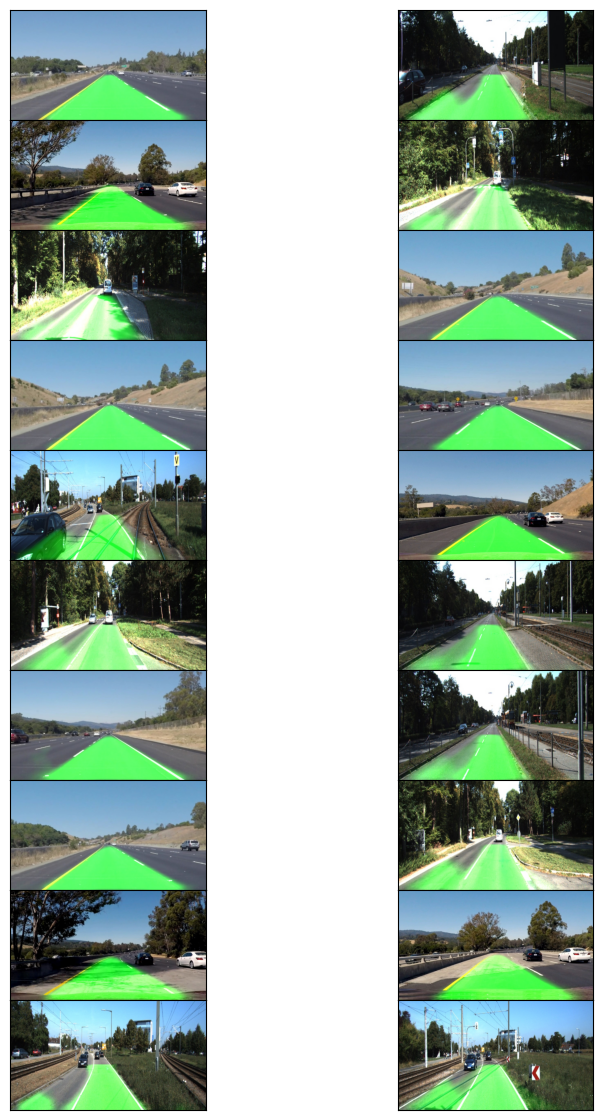

In [ ]:
# plot the predicted result
predicted_images = [
    plt.imread(path) for path in glob.glob("/kaggle/working/test_predict/*.jpg")
]
show_images(predicted_images)